In [1]:
# Load train data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/train.csv', sep=";", header=0)
df_test = pd.read_csv('data/test.csv', sep=";", header=0)

In [ ]:
# Columns to remove
cols_to_remove = ["heal_shape_type", "toe_cap_type", "archetype"]

In [3]:
WAIST_APPLIES_TO = {
    'Jeans', 'Trousers', 'Skirts', 'Shorts', 'Leggings and joggers',
    'Intimate'
}

df["waist_applicable"] = df["family"].isin(WAIST_APPLIES_TO).astype(int)

def clean_waist_type(row):
    wt = row["waist_type"]
    applicable = row["waist_applicable"]

    if pd.notnull(wt):
        return wt                           # Real waist type from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"          # Should exist but missing
        else:
            return "NOT_APPLICABLE"         # Attribute irrelevant for this category

df["waist_type"] = df.apply(clean_waist_type, axis=1)

In [ ]:
# Determine if length_type is applicable to each family
# A family is applicable if it has at least one non-null length_type value
family_length_applicable = df.groupby("family")["length_type"].apply(
    lambda x: x.notna().any()
).to_dict()

df["length_applicable"] = df["family"].map(family_length_applicable).astype(int)

def clean_length_type(row):
    lt = row["length_type"]
    applicable = row["length_applicable"]

    if pd.notnull(lt):
        return lt                           # Real length type from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"          # Should exist but missing
        else:
            return "NOT_APPLICABLE"         # Attribute irrelevant for this category

df["length_type"] = df.apply(clean_length_type, axis=1)


In [ ]:
# Determine if silhouette_type is applicable to each family
# A family is applicable if it has at least one non-null silhouette_type value
family_silhouette_applicable = df.groupby("family")["silhouette_type"].apply(
    lambda x: x.notna().any()
).to_dict()

df["silhouette_applicable"] = df["family"].map(family_silhouette_applicable).astype(int)

def clean_silhouette_type(row):
    st = row["silhouette_type"]
    applicable = row["silhouette_applicable"]

    if pd.notnull(st):
        return st                          # Real silhouette type from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"         # Should exist but missing
        else:
            return "NOT_APPLICABLE"        # Attribute irrelevant for this category

df["silhouette_type"] = df.apply(clean_silhouette_type, axis=1)


In [ ]:
# Determine if neck_lapel_type is applicable to each family
# A family is applicable if it has at least one non-null neck_lapel_type value
family_neck_lapel_applicable = df.groupby("family")["neck_lapel_type"].apply(
    lambda x: x.notna().any()
).to_dict()

df["neck_lapel_applicable"] = df["family"].map(family_neck_lapel_applicable).astype(int)

def clean_neck_lapel_type(row):
    nlt = row["neck_lapel_type"]
    applicable = row["neck_lapel_applicable"]

    if pd.notnull(nlt):
        return nlt                         # Real neck/lapel type from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"         # Should exist but missing
        else:
            return "NOT_APPLICABLE"        # Attribute irrelevant for this category

df["neck_lapel_type"] = df.apply(clean_neck_lapel_type, axis=1)


In [ ]:
# Determine if sleeve_length_type is applicable to each family
# A family is applicable if it has at least one non-null sleeve_length_type value
family_sleeve_length_applicable = df.groupby("family")["sleeve_length_type"].apply(
    lambda x: x.notna().any()
).to_dict()

df["sleeve_length_applicable"] = df["family"].map(family_sleeve_length_applicable).astype(int)

def clean_sleeve_length_type(row):
    slt = row["sleeve_length_type"]
    applicable = row["sleeve_length_applicable"]

    if pd.notnull(slt):
        return slt                         # Real sleeve length type from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"         # Should exist but missing
        else:
            return "NOT_APPLICABLE"        # Attribute irrelevant for this category

df["sleeve_length_type"] = df.apply(clean_sleeve_length_type, axis=1)


In [ ]:
# Determine if woven_structure is applicable to each family
# A family is applicable if it has at least one non-null woven_structure value
family_woven_structure_applicable = df.groupby("family")["woven_structure"].apply(
    lambda x: x.notna().any()
).to_dict()

df["woven_structure_applicable"] = df["family"].map(family_woven_structure_applicable).astype(int)

def clean_woven_structure(row):
    ws = row["woven_structure"]
    applicable = row["woven_structure_applicable"]

    if pd.notnull(ws):
        return ws                         # Real woven structure from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"        # Should exist but missing
        else:
            return "NOT_APPLICABLE"       # Attribute irrelevant for this category

df["woven_structure"] = df.apply(clean_woven_structure, axis=1)


In [ ]:
# Determine if knit_structure is applicable to each family
# A family is applicable if it has at least one non-null knit_structure value
family_knit_structure_applicable = df.groupby("family")["knit_structure"].apply(
    lambda x: x.notna().any()
).to_dict()

df["knit_structure_applicable"] = df["family"].map(family_knit_structure_applicable).astype(int)

def clean_knit_structure(row):
    ks = row["knit_structure"]
    applicable = row["knit_structure_applicable"]

    if pd.notnull(ks):
        return ks                         # Real knit structure from metadata
    else:
        if applicable == 1:
            return "MISSING_VALUE"       # Should exist but missing
        else:
            return "NOT_APPLICABLE"      # Attribute irrelevant for this category

df["knit_structure"] = df.apply(clean_knit_structure, axis=1)


In [11]:
# Analyze which product families have NaN in print_type
print("Analysis of print_type NaN values by family:\n")
print("=" * 60)

# Count NaN and non-NaN values per family
print_type_analysis = df.groupby("family")["print_type"].agg([
    ('total_count', 'count'),
    ('non_null_count', lambda x: x.notna().sum()),
    ('null_count', lambda x: x.isna().sum()),
    ('null_percentage', lambda x: (x.isna().sum() / len(x)) * 100)
]).round(2)

# Sort by null count descending
print_type_analysis = print_type_analysis.sort_values('null_count', ascending=False)

print("\nFamilies with NaN values in print_type:")
print(print_type_analysis[print_type_analysis['null_count'] > 0])

print("\n" + "=" * 60)
print(f"\nTotal families with at least one NaN: {len(print_type_analysis[print_type_analysis['null_count'] > 0])}")
print(f"Total families: {len(print_type_analysis)}")

# Show families that have ALL NaN values
families_all_nan = print_type_analysis[print_type_analysis['null_count'] == print_type_analysis['total_count']]
if len(families_all_nan) > 0:
    print(f"\nFamilies with ALL NaN values in print_type ({len(families_all_nan)}):")
    print(families_all_nan.index.tolist())
else:
    print("\nNo families have ALL NaN values in print_type")


Analysis of print_type NaN values by family:


Families with NaN values in print_type:
                 total_count  non_null_count  null_count  null_percentage
family                                                                   
Leather jackets           28              28          92            76.67
Shirt                   9189            9189           8             0.09


Total families with at least one NaN: 2
Total families: 26

No families have ALL NaN values in print_type


In [12]:
# Get all print_type values for family "Leather jackets"
leather_jackets = df[df["family"] == "Leather jackets"]

print("Print_type values for 'Leather jackets' family:")
print("=" * 60)

# Show unique values and their counts
print_type_values = leather_jackets["print_type"].value_counts(dropna=False).sort_index()
print("\nUnique print_type values and their counts:")
print(print_type_values)

print(f"\nTotal rows: {len(leather_jackets)}")
print(f"Unique print_type values (including NaN): {leather_jackets['print_type'].nunique(dropna=False)}")
print(f"Unique print_type values (excluding NaN): {leather_jackets['print_type'].nunique(dropna=True)}")
print(f"NaN count: {leather_jackets['print_type'].isna().sum()}")

print("\nAll unique print_type values:")
print(sorted(leather_jackets["print_type"].dropna().unique().tolist()))


Print_type values for 'Leather jackets' family:

Unique print_type values and their counts:
print_type
Sin Estampado    28
NaN              92
Name: count, dtype: int64

Total rows: 120
Unique print_type values (including NaN): 2
Unique print_type values (excluding NaN): 1
NaN count: 92

All unique print_type values:
['Sin Estampado']


In [ ]:
# Replace all missing values in print_type with "Sin Estampado"
nan_count_before = df["print_type"].isna().sum()
df["print_type"] = df["print_type"].fillna("Sin Estampado")
nan_count_after = df["print_type"].isna().sum()

print(f"Replaced {nan_count_before} NaN values in print_type with 'Sin Estampado'")
print(f"Remaining NaN values: {nan_count_after}")


In [4]:
df["color_rgb"]

0        255,215,0
1        255,215,0
2        255,215,0
3        255,215,0
4        255,215,0
           ...    
95334        0,0,0
95335        0,0,0
95336        0,0,0
95337        0,0,0
95338        0,0,0
Name: color_rgb, Length: 95339, dtype: object

In [ ]:
import os
# Fix for Windows threadpoolctl/OpenBLAS issue
os.environ['OMP_NUM_THREADS'] = '1'

# Disable threadpoolctl to avoid OpenBLAS inspection error on Windows
try:
    from sklearn import config_context
    # Use config_context to disable threadpoolctl
    import sklearn.utils.fixes
    # Monkey patch threadpool_limits to be a no-op
    original_threadpool_limits = sklearn.utils.fixes.threadpool_limits
    
    class NoOpContext:
        def __enter__(self):
            return self
        def __exit__(self, *args):
            return False
    
    def patched_threadpool_limits(*args, **kwargs):
        return NoOpContext()
    
    sklearn.utils.fixes.threadpool_limits = patched_threadpool_limits
except Exception:
    pass  # If patching fails, continue anyway

def parse_rgb(x):
    if pd.isna(x):
        return [np.nan, np.nan, np.nan]
    # remove parentheses and split
    x = str(x).replace("(", "").replace(")", "")
    parts = x.split(",")
    if len(parts) != 3:
        return [np.nan, np.nan, np.nan]
    return [float(parts[0]), float(parts[1]), float(parts[2])]

df[["R", "G", "B"]] = df["color_rgb"].apply(lambda x: pd.Series(parse_rgb(x)))

df = df.dropna(subset=["R", "G", "B"])

scaler = StandardScaler()
rgb_scaled = scaler.fit_transform(df[["R", "G", "B"]])

# -------------------------
# 4. (Optional) Name the clusters
# -------------------------
# Compute the centroid color for each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

def name_color(center):
    r, g, b = center
    # simple heuristic naming — you can refine this
    if r > 180 and g < 80 and b < 80:
        return "red"
    if r < 80 and g > 180 and b < 80:
        return "green"
    if r < 80 and g < 80 and b > 180:
        return "blue"
    if r > 200 and g > 200 and b < 80:
        return "yellow"
    if r > 200 and g > 200 and b > 200:
        return "white"
    if r < 60 and g < 60 and b < 60:
        return "black"
    if r > 150 and g < 100 and b > 150:
        return "purple"
    if r > 150 and g > 100 and b > 100:
        return "beige"
    return "other"

cluster_color_names = {
    i: name_color(center)
    for i, center in enumerate(cluster_centers)
}

df["color_cluster"] = df["color_cluster"].map(cluster_color_names)


Evaluating different numbers of clusters...
  Completed k=5...
  Completed k=10...
  Completed k=15...
  Completed k=20...

Optimal k based on Silhouette Score: 20 (score: 0.725)


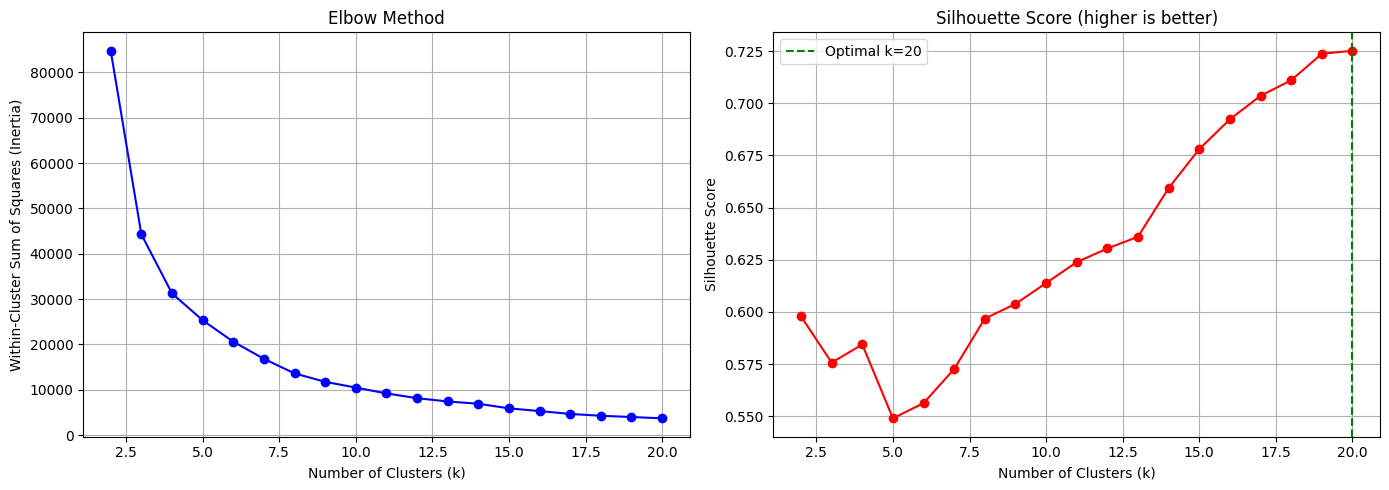


Detailed scores:
k     Inertia      Silhouette  
------------------------------
2     84794.21     0.598       
3     44284.51     0.576       
4     31245.79     0.584       
5     25326.89     0.549       
6     20588.25     0.556       
7     16811.31     0.573       
8     13591.65     0.597       
9     11734.89     0.604       
10    10464.90     0.614       
11    9177.83      0.624       
12    8124.77      0.630       
13    7398.93      0.636       
14    6895.89      0.659       
15    5879.89      0.678       
16    5277.75      0.692       
17    4651.05      0.704       
18    4238.96      0.711       
19    3971.91      0.724       
20    3676.76      0.725       


In [ ]:
# Determine optimal number of clusters using multiple methods
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of k values to test
k_range = range(2, 21)  # Test k from 2 to 20
inertias = []
silhouette_scores = []

print("Evaluating different numbers of clusters...")
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(rgb_scaled)
    
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(rgb_scaled, labels))
    
    if k % 5 == 0:
        print(f"  Completed k={k}...")

# Find optimal k based on silhouette score
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]

print(f"\nOptimal k based on Silhouette Score: {optimal_k_silhouette} (score: {max(silhouette_scores):.3f})")

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method (Inertia)
axes[0].plot(k_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Within-Cluster Sum of Squares (Inertia)')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

# Silhouette Score
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].axvline(x=optimal_k_silhouette, color='g', linestyle='--', label=f'Optimal k={optimal_k_silhouette}')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score (higher is better)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print detailed scores for manual inspection
print("\nDetailed scores:")
print(f"{'k':<5} {'Inertia':<12} {'Silhouette':<12}")
print("-" * 30)
for i, k in enumerate(k_range):
    print(f"{k:<5} {inertias[i]:<12.2f} {silhouette_scores[i]:<12.3f}")


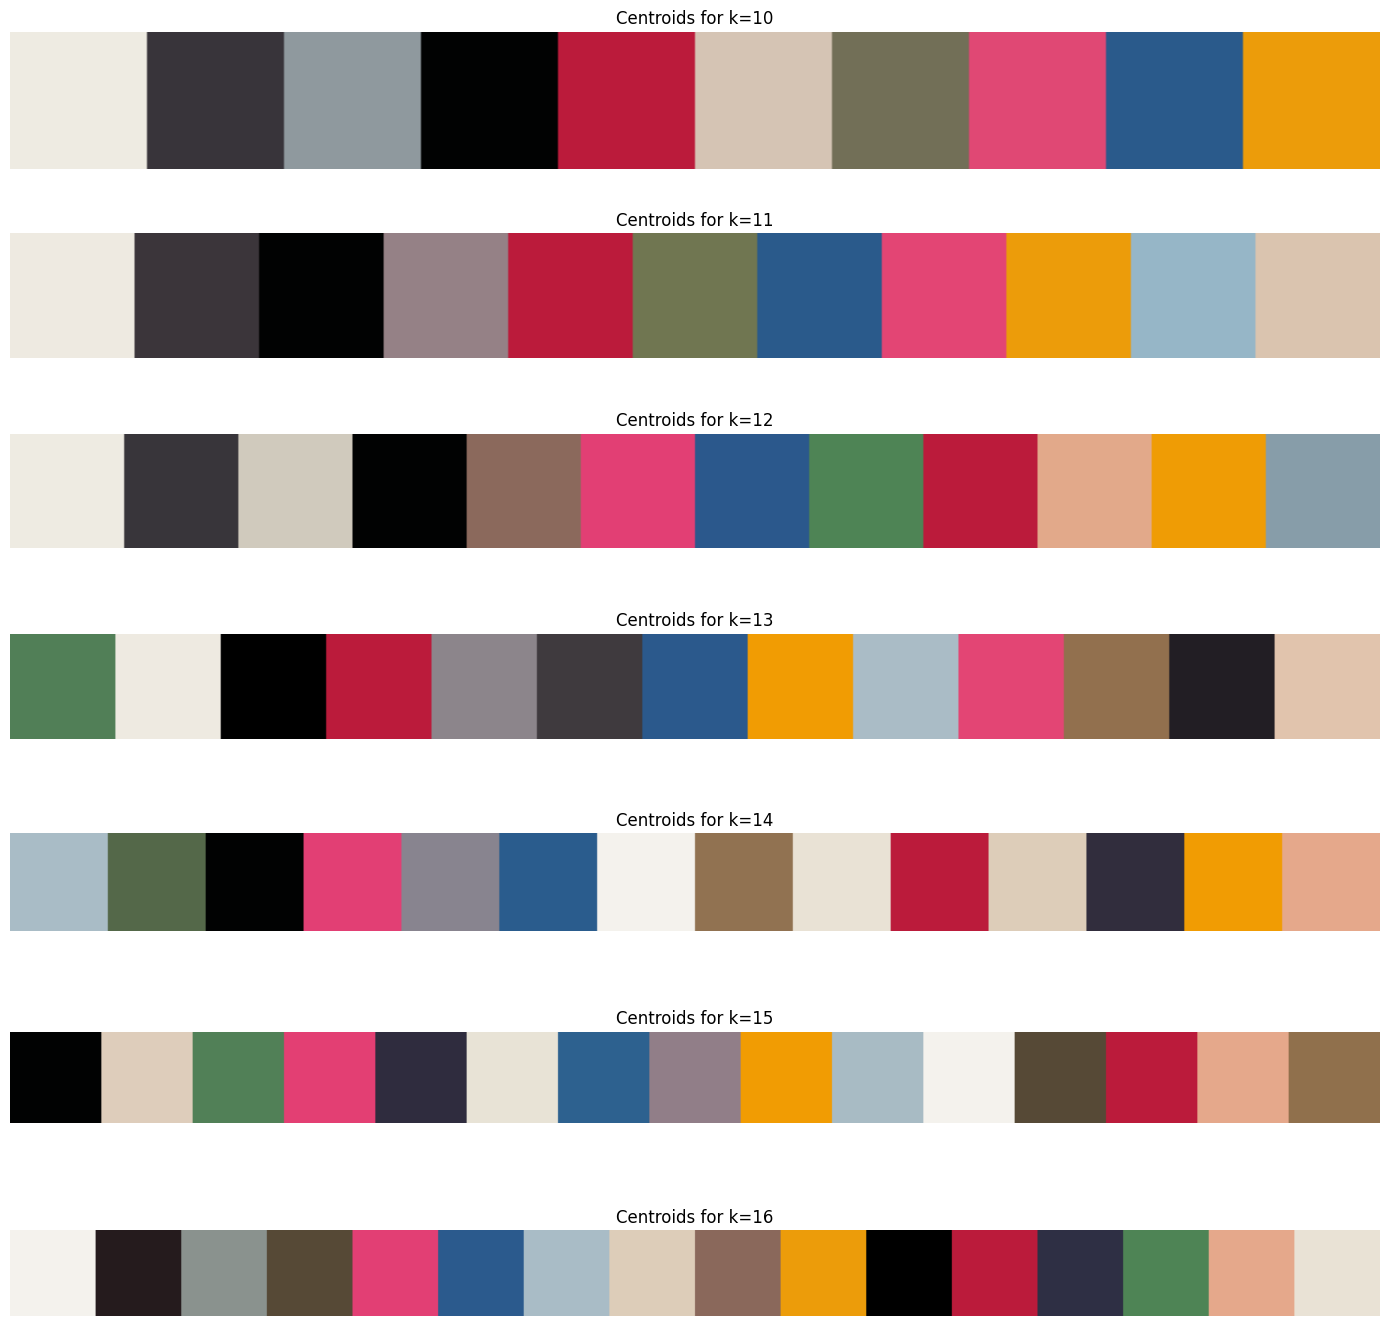

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Convert centroids back to original RGB for plotting
def get_centroids(k):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(rgb_scaled)
    # inverse-transform to original RGB scale
    return scaler.inverse_transform(kmeans_temp.cluster_centers_)

# ---- Plotting ----
Ks_to_plot = [10, 11, 12, 13, 14, 15, 16]   # choose any set of k values
n_rows = len(Ks_to_plot)

fig, axes = plt.subplots(n_rows, 1, figsize=(14, 2*n_rows))

if n_rows == 1:
    axes = [axes]

for idx, k in enumerate(Ks_to_plot):
    centroids = get_centroids(k)
    
    # Clip values to RGB range
    centroids = np.clip(centroids, 0, 255).astype(int)
    
    # Build an image strip where each square is a centroid
    color_strip = np.zeros((50, 50*k, 3), dtype=np.uint8)
    for i, color in enumerate(centroids):
        color_strip[:, i*50:(i+1)*50, :] = color
    
    axes[idx].imshow(color_strip)
    axes[idx].set_title(f"Centroids for k={k}", fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Perform clustering with optimal k (or choose manually based on the plots above)
# You can use optimal_k_silhouette or choose your own value
N_CLUSTERS = 15

print(f"Using k={N_CLUSTERS} clusters")

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)  
df["color_cluster"] = kmeans.fit_predict(rgb_scaled)
